nr of spikes: 0


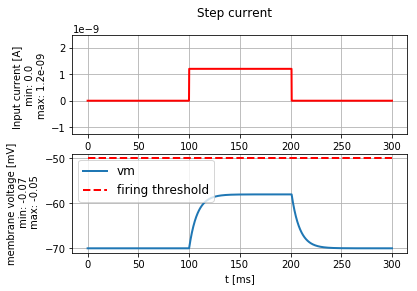

nr of spikes: 5


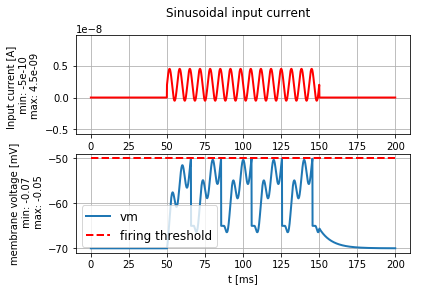

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [1]:
  %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools


LIF.getting_started()
LIF.print_default_parameters()

nr of spikes: 0


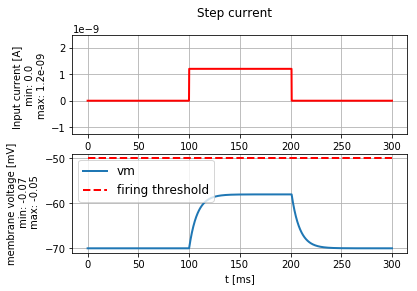

nr of spikes: 5


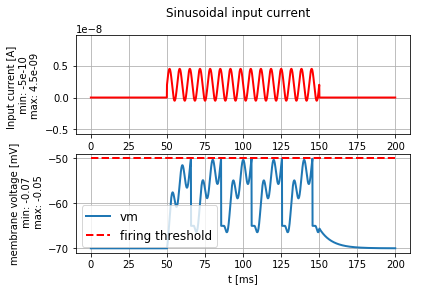

In [2]:
LIF.getting_started()


In [3]:
from neurodynex.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -0.07


nr of spikes: 0


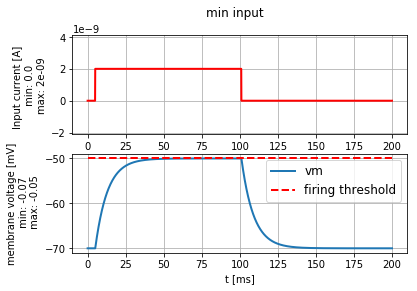

In [4]:
import brian2 as b2
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory

# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude= 2* b2.namp )  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200* b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

In [5]:
# Printing default parameters
print('Resting potential: {}'.format(LIF.V_REST))
print('Firing threshold: {}'.format(LIF.FIRING_THRESHOLD))
print('Membrane resistance: {}'.format(LIF.MEMBRANE_RESISTANCE))

i_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / LIF.MEMBRANE_RESISTANCE

print('The minimal current for firing is: {}'.format(i_min))

Resting potential: -0.07
Firing threshold: -0.05
Membrane resistance: 10000000.0
The minimal current for firing is: 2e-09


In [6]:
current_amp_list = np.arange(0, 100, 10) 
# store firing rates
firing_rate_record = list()
refractory_period = 3 * b2.ms

for current_amp in current_amp_list:
    # create step current
    step_current = input_factory.get_step_current(
               t_start=10, t_end=490, unit_time=b2.ms,
               amplitude = current_amp * b2.mA
               )
    # run simulation 
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(
                                 input_current=step_current,
                                 simulation_time=500 * b2.ms,
    abs_refractory_period = refractory_period
                                 )
    # get the number of spikes 
    spike_count = spike_monitor.count[0]
    # conver that to firing rate
    firing_rate = spike_count / (480 * 10**-3) # current injected for 95ms
    firing_rate_record.append(firing_rate)

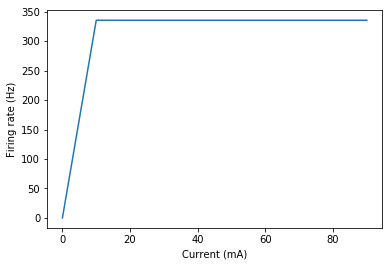

In [7]:

plt.figure()
plt.plot(current_amp_list, firing_rate_record)
plt.xlabel('Current (mA)')
plt.ylabel('Firing rate (Hz)')
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0xc019828>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc03b9e8>)

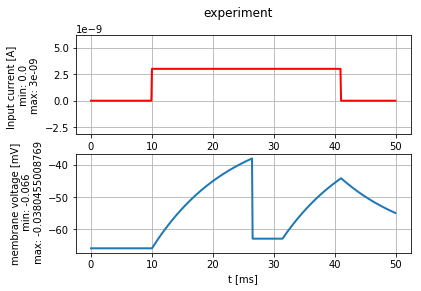

In [8]:
# get random parameter
random_parameters = LIF.get_random_param_set(random_seed=432)

# define test current 
test_current = input_factory.get_step_current(
t_start=10, t_end=40, unit_time=b2.ms, amplitude=3*b2.namp)

# probe the neuron. pass the test current AND the random parames to the function 
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot 
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title='experiment')

In [9]:
state_monitor.__dict__.keys()
# state_monitor.recorded_variables

['template_kwds',
 'when',
 'variables',
 'abstract_code',
 'recorded_variables',
 'n_indices',
 '_creation_stack',
 'override_conditional_write',
 'group',
 'record_all',
 'codeobj_class',
 '_network',
 '_stored_states',
 'namespace',
 'source',
 'generate_empty_code',
 'template',
 'needed_variables',
 '_scope_key',
 '_clock',
 '_indices',
 '_code_objects',
 'record_variables',
 'user_code',
 'codeobj',
 '_contained_objects',
 'check_units',
 '_full_creation_stack',
 '_active',
 'written_readonly_vars',
 '_name',
 'record',
 '_dependencies',
 'indices',
 '_group_attribute_access_active',
 '_id',
 'order']

In [10]:
print('Resting potential:', min(state_monitor.v[0]))


('Resting potential:', -66. * mvolt)


In [11]:
state_monitor.t
indexOfInterest = np.where(state_monitor.t == 30.1 * b2.msecond)[0] # 30 ms
print('Reset potential:', state_monitor.v[0][indexOfInterest])

('Reset potential:', array([-63.]) * mvolt)


(<matplotlib.axes._subplots.AxesSubplot at 0xc03bc88>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb3993c8>)

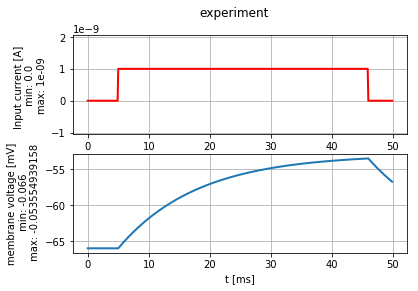

In [12]:

# get random parameter
random_parameters = LIF.get_random_param_set(random_seed=432)

# define test current 
test_current = input_factory.get_step_current(
t_start=5, t_end=45, unit_time=b2.ms, amplitude=1*b2.namp)

# probe the neuron. pass the test current AND the random parames to the function 
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot 
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title='experiment')

In [13]:
u_rest = -66
u_max = -53.55
delta_u = u_max - u_rest
u_t = u_rest + 0.63 * delta_u 
print('Target u_t: %.2f mV' % u_t)

Target u_t: -58.16 mV


In [14]:
# Finding time where state_monitor.v[0] == u_t

# np.round(state_monitor.v[0], 4) # not sure have to round to '4 decimal places'
u_t_index = np.where(np.round(state_monitor.v[0], 4) == np.round(u_t, 1) * b2.mV)

tau = state_monitor.t[u_t_index[0][0]] # pick the first match

print('Time constant:', tau)

('Time constant:', 16.8 * msecond)


In [15]:
print('Firing threshold:', max(state_monitor.v[0]))


('Firing threshold:', -53.55493916 * mvolt)


In [16]:
print('Firing threshold:', max(state_monitor.v[0]))

('Firing threshold:', -53.55493916 * mvolt)


In [17]:
LIF.print_obfuscated_parameters(random_parameters)


Resting potential: -0.066
Reset voltage: -0.063
Firing threshold: -0.038
Membrane resistance: 13000000.0
Membrane time-scale: 0.013
Absolute refractory period: 0.005


nr of spikes: 0


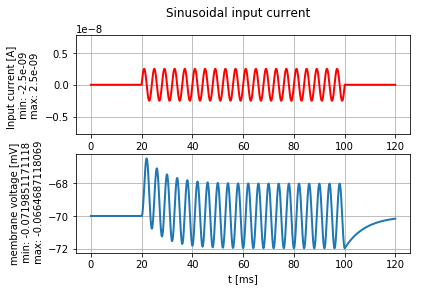

In [18]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [19]:
from scipy.signal import find_peaks 
from scipy.stats import mode

def find_sinusoid_amplitude(sinusoid_signal):
    # assumes that sinusoid_signal is state_monitor.v[0]
    # not tested on general np arrays
    # assume the number of postiive peaks and negative peaks are equal
    positive_peaks_loc = find_peaks(sinusoid_signal)
    positive_peaks_val = sinusoid_signal[positive_peaks_loc[0]]

    negative_peaks_loc = find_peaks(-sinusoid_signal)
    negative_peaks_val = sinusoid_signal[negative_peaks_loc[0]]
    
    # remove positive peak without a negative peak pair 
    positive_peaks_val = positive_peaks_val[:len(negative_peaks_val)]

    amplitude = positive_peaks_val - negative_peaks_val
    amplitude_mode = mode(np.round(amplitude, 5))
    return amplitude_mode[0][0]

In [20]:

input_frequency_list = np.linspace(10, 1000, 50)
oscillation_amp_list = list()

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    sinusoid_amp = find_sinusoid_amplitude(state_monitor.v[0])
    oscillation_amp_list.append(sinusoid_amp)

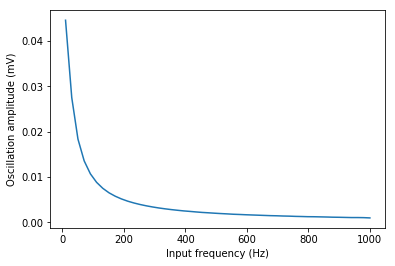

In [21]:
plt.figure()
plt.plot(input_frequency_list, oscillation_amp_list)
plt.xlabel('Input frequency (Hz)')
plt.ylabel('Oscillation amplitude (mV)')
plt.show()

In [22]:
from scipy import signal, fftpack    
import numpy as np
def find_phase_shift(a, b):
    phase_shift_raw = np.argmax(signal.correlate(b, a))
    signal_length = len(a) - 1
    phase_shift = phase_shift_raw - signal_length 
    return phase_shift

# test run on example
a = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])

# expect a phase shift value of 4 (arbitrary units)
print('Phase shift: %.2f' % find_phase_shift(a, b))

Phase shift: 4.00


In [23]:

print(np.asarray(sinusoidal_current.values).shape)
print(np.asarray(state_monitor.v[0]).shape)

(1002L, 1L)
(1200L,)


In [24]:
input_frequency_list = np.linspace(10, 1000, 50)
phase_shift_list = list()

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    
    current_val = np.asarray(sinusoidal_current.values)
    current_val = np.squeeze(current_val)
    
    voltage_val = np.asarray(state_monitor.v[0])
    # voltage_val = voltage_val[200:1000] # only when current is ON
    
    phase_shift_no_units = find_phase_shift(current_val, voltage_val)
    phase_shift = phase_shift_no_units * 0.1 * b2.ms 
    phase_shift_list.append(phase_shift)

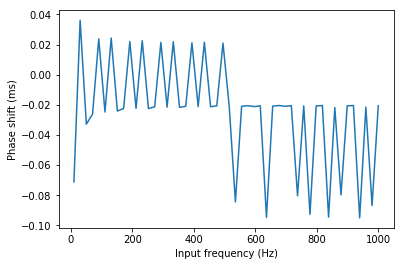

In [25]:
plt.figure()
plt.plot(input_frequency_list, phase_shift_list)
plt.ylabel('Phase shift (ms)')
plt.xlabel('Input frequency (Hz)')
plt.show()